<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# Załaduj dane fashion_mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
# Budowa bardziej złożonej sieci neuronowej
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # nowa warstwa, więcej neuronów
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(
    optimizer=SGD(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
fit = model.fit(X_train, y_train, epochs=100,
                batch_size=256,
                validation_data=(X_test, y_test),
                callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5854 - loss: 1.2672 - val_accuracy: 0.7961 - val_loss: 0.5892
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8006 - loss: 0.5682 - val_accuracy: 0.8044 - val_loss: 0.5433
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8246 - loss: 0.4929 - val_accuracy: 0.8290 - val_loss: 0.4881
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8403 - loss: 0.4507 - val_accuracy: 0.8264 - val_loss: 0.4858
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.4156 - val_accuracy: 0.8285 - val_loss: 0.4769
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 0.4000 - val_accuracy: 0.8339 - val_loss: 0.4601
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8617 - loss: 0.3864 - val_accuracy: 0.8189 - val_loss: 0.4724
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.3776 - val_acc

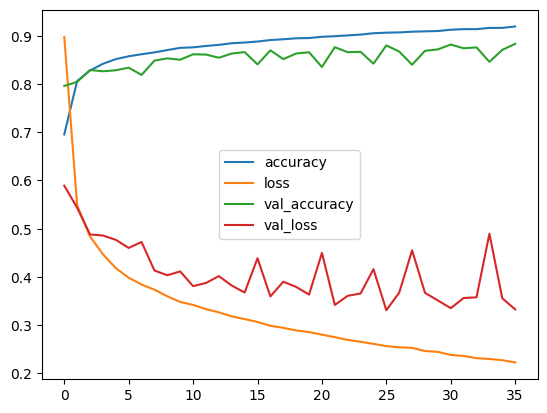

In [20]:
pd.DataFrame(fit.history).plot();

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.3363


[0.330932080745697, 0.8799999952316284]

In [22]:
model.evaluate(X_train, y_train, batch_size=256)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9114 - loss: 0.2399


[0.24244263768196106, 0.9103666543960571]

In [23]:
y_test_pred = fit.model.predict(X_test, batch_size=256).argmax(axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


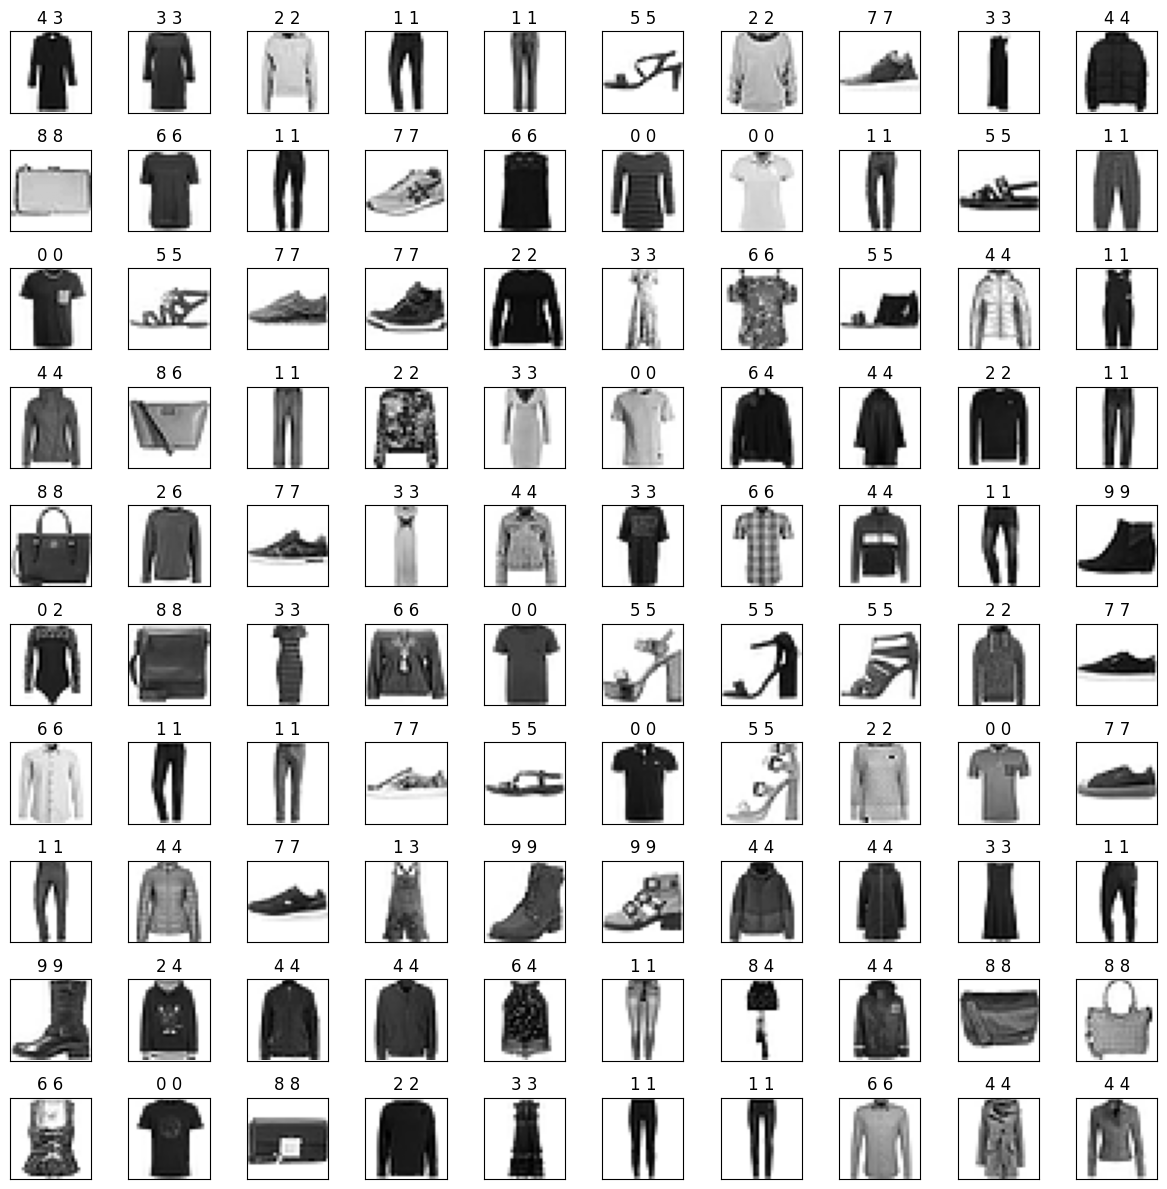

In [24]:
# Wizualizacja przykładowych predykcji
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
k = 0
ind = np.random.randint(10000, size=100)
for i in range(10):
    for j in range(10):
        n = ind[k]
        ax[i, j].imshow(X_test[n], cmap='gray_r')
        ax[i, j].axes.get_xaxis().set_ticks([])
        ax[i, j].axes.get_yaxis().set_ticks([])
        ax[i, j].set_title('{} {}'.format(y_test[n], y_test_pred[n]))
        k += 1
fig.tight_layout()